In [1]:
import json
import spacy
import nltk
import requests
import datetime
import matplotlib.pyplot as plt

## Querying the pushshift api:

In [99]:
def get_submission_data(subreddit, keyword, lookback_days=0, num_posts=100):
    h_page = requests.get('http://api.pushshift.io/reddit/search/submission/?subreddit={}&q={}&before={}d&size={}&sort_type=score'.format(subreddit, keyword, lookback_days, num_posts))
    submissions_data = json.loads(h_page.text)
    return submissions_data
# Default is 25, max is 100

# Default is  the last n comments, we'll use sort_type = score, to try to get reasonable posts to start
# query (q) is case-insensitive, can be used to match two different words e.g. &q=radiohead+band
# multiple subreddits e.g. ?subreddit=headphones,headphoneadvice
# Sorting can be done by score or date e.g. sort=score:desc

# can also filter for certain fields e.g. &filter=author,score,subreddit

# Advanced: using subreddit aggregation allows us to determine the top subreddits
# mentioning a certain word. Example using "trump"

# Write a function which will pull-in 
# 5 seconds?

subreddit = 'headphoneadvice'
lookback_days = 10
num_posts = 500
keywords_advice = ['recommendations', 'best', 'advice']

h_page = requests.get('http://api.pushshift.io/reddit/search/submission/?subreddit={}&q=recommendations&before={}d&size={}&sort_type=score'.format(subreddit,lookback_days, num_posts))

In [100]:
submissions_data_rec = get_submission_data('headphoneadvice', 'recommendations')

In [116]:
submissions_data_best = get_submission_data('headphoneadvice', 'best', num_posts=200)
submissions_data_advice = get_submission_data('headphoneadvice', 'advice')

In [39]:
d = submissions_data['data'][5]
# This takes 5 seconds per submission
c_page = requests.get('https://api.pushshift.io/reddit/submission/comment_ids/{}'.format(d['id']))

In [82]:
submissions_data = json.loads(h_page.text)

In [40]:
submissions_data['data'][:5]

[{'all_awardings': [],
  'allow_live_comments': False,
  'author': 'ClarkDiggity',
  'author_flair_css_class': None,
  'author_flair_richtext': [],
  'author_flair_text': None,
  'author_flair_type': 'text',
  'author_fullname': 't2_16o181',
  'author_patreon_flair': False,
  'awarders': [],
  'can_mod_post': False,
  'contest_mode': False,
  'created_utc': 1570816557,
  'domain': 'self.headphones',
  'full_link': 'https://www.reddit.com/r/headphones/comments/dgir97/recommendations_for_a_headphone_noob/',
  'gildings': {},
  'id': 'dgir97',
  'is_crosspostable': True,
  'is_meta': False,
  'is_original_content': False,
  'is_reddit_media_domain': False,
  'is_robot_indexable': True,
  'is_self': True,
  'is_video': False,
  'link_flair_background_color': '',
  'link_flair_richtext': [],
  'link_flair_text_color': 'dark',
  'link_flair_type': 'text',
  'locked': False,
  'media_only': False,
  'no_follow': True,
  'num_comments': 1,
  'num_crossposts': 0,
  'over_18': False,
  'parent_w

In [83]:
num_retrieved = len(submissions_data['data'])
num_retrieved

100

In [126]:
def get_timestamps(submissions_data):
    timestamps = [s['created_utc'] for s in submissions_data['data']]
    dts = [datetime.datetime.fromtimestamp(ts) for ts in timestamps]
    return dts

def get_scores(submissions_data):
    scores = [s['score'] for s in submissions_data['data']]
    return scores

def get_num_comments(submissions_data):
    num_comments = [s['num_comments'] for s in submissions_data['data'] if s['num_comments']]
    return num_comments

100


(array([ 8., 11., 24., 22., 23.,  1.,  1.,  0.,  0., 10.]),
 array([737106.4290162 , 737158.75458565, 737211.08015509, 737263.40572454,
        737315.73129398, 737368.05686343, 737420.38243287, 737472.70800231,
        737525.03357176, 737577.3591412 , 737629.68471065]),
 <a list of 10 Patch objects>)

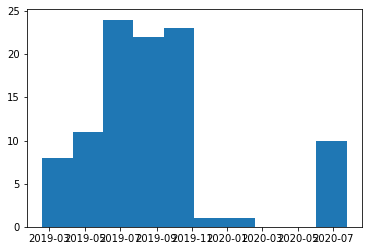

In [117]:

dts = get_timestamps(submissions_data_best)
print(len(submissions_data_best['data']))
plt.hist(dts)


(array([82., 14.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 15. ,  47.8,  80.6, 113.4, 146.2, 179. , 211.8, 244.6, 277.4,
        310.2, 343. ]),
 <a list of 10 Patch objects>)

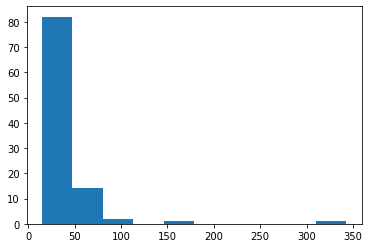

In [110]:
scores = get_scores(submissions_data_best)
plt.hist(scores)

3422

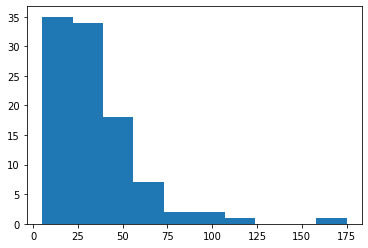

In [128]:
num_comments = get_num_comments(submissions_data_best)
plt.hist(num_comments)
sum(num_comments)

(array([ 1.,  0.,  2.,  8.,  0., 33., 25., 28.,  0.,  3.]),
 array([736535.35039352, 736644.33024537, 736753.31009722, 736862.28994907,
        736971.26980093, 737080.24965278, 737189.22950463, 737298.20935648,
        737407.18920833, 737516.16906019, 737625.14891204]),
 <a list of 10 Patch objects>)

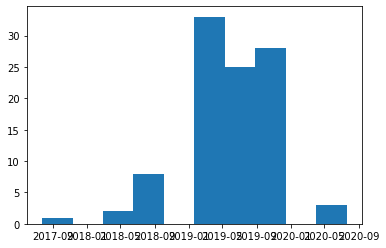

In [106]:
dts = get_timestamps(submissions_data_advice)
plt.hist(dts)

(array([70., 23.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  9. ,  25.7,  42.4,  59.1,  75.8,  92.5, 109.2, 125.9, 142.6,
        159.3, 176. ]),
 <a list of 10 Patch objects>)

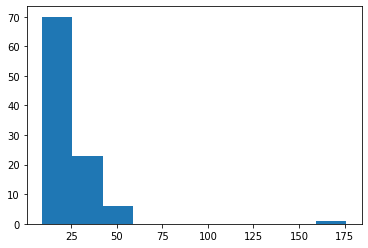

In [111]:
scores = get_scores(submissions_data_advice)
plt.hist(scores)

2190

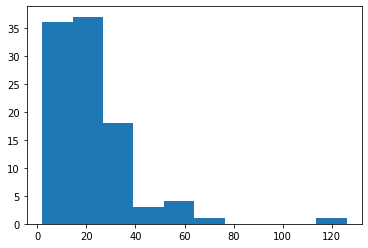

In [130]:
num_comments = get_num_comments(submissions_data_advice)
plt.hist(num_comments)
sum(num_comments)

(array([ 1.,  0.,  1., 11.,  0., 25., 36., 18.,  1.,  7.]),
 array([736535.35039352, 736644.35645833, 736753.36252315, 736862.36858796,
        736971.37465278, 737080.38071759, 737189.38678241, 737298.39284722,
        737407.39891204, 737516.40497685, 737625.41104167]),
 <a list of 10 Patch objects>)

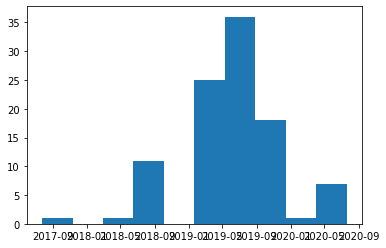

In [108]:
dts = get_timestamps(submissions_data_rec)
plt.hist(dts)

(array([55., 12., 11., 10.,  5.,  3.,  2.,  0.,  0.,  2.]),
 array([ 8. , 14.6, 21.2, 27.8, 34.4, 41. , 47.6, 54.2, 60.8, 67.4, 74. ]),
 <a list of 10 Patch objects>)

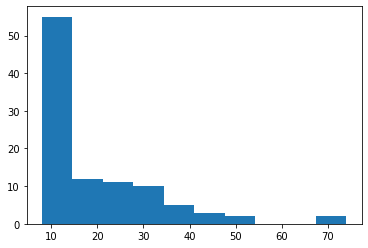

In [112]:
scores = get_scores(submissions_data_rec)
plt.hist(scores)

2034

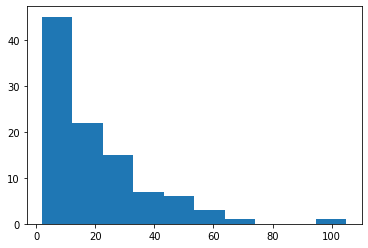

In [131]:
num_comments = get_num_comments(submissions_data_rec)
plt.hist(num_comments)
sum(num_comments)

In [136]:
submissions_data_rec['data'][5]

{'all_awardings': [],
 'allow_live_comments': False,
 'author': 'Itz5Y',
 'author_flair_css_class': None,
 'author_flair_richtext': [],
 'author_flair_text': None,
 'author_flair_type': 'text',
 'author_fullname': 't2_11z2lv',
 'author_patreon_flair': False,
 'author_premium': False,
 'awarders': [],
 'can_mod_post': False,
 'contest_mode': False,
 'created_utc': 1591874188,
 'domain': 'self.HeadphoneAdvice',
 'edited': 1591918637,
 'full_link': 'https://www.reddit.com/r/HeadphoneAdvice/comments/h0xdat/wireless_headsets_under_100/',
 'gildings': {},
 'id': 'h0xdat',
 'is_crosspostable': True,
 'is_meta': False,
 'is_original_content': False,
 'is_reddit_media_domain': False,
 'is_robot_indexable': True,
 'is_self': True,
 'is_video': False,
 'link_flair_background_color': '#0aa18f',
 'link_flair_css_class': 'blue',
 'link_flair_richtext': [],
 'link_flair_template_id': '84f328f2-6d4d-11e7-8adf-0eb9d87ab560',
 'link_flair_text': 'Headphones - Wireless/Portable',
 'link_flair_text_color'

In [3]:
data = json.loads(page.text)
print(len(data['data']))

31


## Get submissions from subreddit, with certain parameters

In [17]:
# Get a related submission and then all comments 
# Say we're looking for advice or recommendations and headphones

# A) Get all posts in the subreddit headphones in the last 100 days which include the words best and advice
h_page = requests.get('http://api.pushshift.io/reddit/search/submission/?subreddit=headphoneadvice&q=best+advice&before=360d')
h_data = json.loads(h_page.text)
print(len(h_data['data']))

In [19]:
# Print title of submissions
for d in h_data['data']:
    print(d['title'])

[PA] Gaming Headset Purchase advice for PC
OpAmp Rolling
[PA] EDM listener IEMs for £100 or less
Need advice: Beyerdynamic DT770, Shure SRH840 or Audio-Technica M50X?
Seeking some advice
Best over-ear headphones under 100$ with good cushioning and durability
[PA] Beyerdynamic Custom vs. DT770 Pro
Inear decision making
Beyerdynamic Custom Series and DT770?
[PA] Buying my first IEM's. 50-100$. Details inside
[PA] I would like something decent to liste to deadmau5
Headset under $100 ? (Razer Kraken Pro / Cooler Master MH752)
Best amp/DAC?
Should I buy an amp for my Dt 880s? and other questions! I appreciate any and all advice.
Best starter audiophile headphones?
[PA] Is the Audio Technica M40x a good pair of headphones for casual listening?
Headphone advice for noise cancelling for long periods
[PA] Best alternative to the Jabra Elite 65T with no master/slave connection
[PA] [CO] [please help!] Starter Looking to Get Advice on Headphones and Amps/DACs, Heavily Considering Sennheiser HD 65

In [ ]:
def get_assoc_comments(d):
    ''' Using a submission JSON, return a new JSON of all comments.'''
    c_page = requests.get('https://api.pushshift.io/reddit/submission/comment_ids/{}'.format(d['id']))
    c_data = json.loads(c_page.text)
    
    cs_page = requests.get('https://api.pushshift.io/reddit/comment/search?ids={}'.format(",".join(c_data['data'])))
    cs_data = json.loads(cs_page.text)
    
    return(cs_data['data'])

nlp = spacy.load("en_core_web_md")
nlp.add_pipe(nlp.create_pipe('sentencizer'))

In [93]:
comments = get_assoc_comments(h_data['data'][17]) #d

In [99]:
comments[0]['body']

'Maybe some galaxy buds?'

In [105]:
get_ents(a_text)

TW 50 52 383 ORG
Hifiman 319 326 386 PRODUCT
1more 355 360 383 ORG
NuForce BeFrees 386 401 380 PERSON
6 412 413 397 CARDINAL
Audio-Technica 457 471 383 ORG
150 486 489 394 MONEY
IFS 

 508 514 383 ORG
Lil 523 526 380 PERSON
Lyperchek Teva 532 546 380 PERSON
2020 614 618 397 CARDINAL
iPhone 828 834 383 ORG
11 835 837 397 CARDINAL
Max 842 845 380 PERSON
the Astrotec S80 1016 1032 386 PRODUCT
40 1049 1051 394 MONEY
the Liberty Air 1095 1110 387 EVENT
40 1206 1208 394 MONEY


In [ ]:
comments = get_assoc_comments(h_data['data'][5]) #d

In [152]:
prod_orgs = get_prod_orgs(a_text)
prod_orgs = [p.rstrip() for p in prod_orgs]
Counter(prod_orgs)

TW 50 52 383 ORG
Hifiman 319 326 386 PRODUCT
1more 355 360 383 ORG
NuForce BeFrees 386 401 380 PERSON
6 412 413 397 CARDINAL
Audio-Technica 457 471 383 ORG
150 486 489 394 MONEY
IFS 

 508 514 383 ORG
Lil 523 526 380 PERSON
Lyperchek Teva 532 546 380 PERSON
2020 614 618 397 CARDINAL
iPhone 828 834 383 ORG
11 835 837 397 CARDINAL
Max 842 845 380 PERSON
the Astrotec S80 1016 1032 386 PRODUCT
40 1049 1051 394 MONEY
the Liberty Air 1095 1110 387 EVENT
40 1206 1208 394 MONEY


Counter({'TW': 1,
         'Hifiman': 1,
         '1more': 1,
         'Audio-Technica': 1,
         'IFS': 1,
         'iPhone': 1,
         'the Astrotec S80': 1})

## Grab entities, product-ish

In [146]:
def get_ents(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(ent.text, ent.start_char, ent.end_char, ent.label, ent.label_)

        
def get_prod_orgs(text):
    
    prod_orgs = []
    doc = nlp(text)
    for ent in doc.ents:
        print(ent.text, ent.start_char, ent.end_char, ent.label, ent.label_)    
        if(ent.label ==383 or ent.label== 386):
            # If it's an ORG, and the next token is alphanumeric combo (SR800, S300, HD599, etc),
            # then add that to it?
            prod_orgs.append(ent.text)
    return prod_orgs  
        
        
        
def get_ents_sentsplit(text):
    doc = nlp(text)
    sentences = [sent.string.strip() for sent in doc.sents]
    
    for s in sentences:
            doc = nlp(s)
            for ent in doc.ents:
                print(ent.text, ent.start_char, ent.end_char, ent.label_)
                print([(token.idx, token, type(token), token.nbor()) for token in ent])
                
def candidate_products(text):
    doc = nlp(text)
    product_list = []
    likely_product = []
    sentences = [sent.string.strip() for sent in doc.sents]
    
    for s in sentences:
            doc = nlp(s)
            for ent in doc.ents:
                #print(ent.text, ent.start_char, ent.end_char, ent.label_)
                #print([(token.idx, token, type(token), token.nbor()) for token in ent])
                #print([(token, token.nbor()) for token in ent])
                for token in ent:
                    try:
                        product_list.extend([(token, token.nbor())])
                    except:
                        print("IndexError")
                        
                if(ent.label == 380): #Product
                    likely_product.append(ent.text)
    return product_list, likely_product

In [151]:
from collections import Counter
def score_from_prod_list(prod_list):
    # Counter({'b': 2, 'a': 1})
    # Really, should do some string manipulations to ensure we aren't double counting (lower, etc)
    return Counter(prod_list)

In [52]:
entity = doc.ents[0]
print(f"Token on the left: '{doc[entity.start - 1]}'")
print(f"Token on the right: '{doc[entity.end]}'") 

In [53]:
comments[0]['body']

"Not sure if the open air design is acceptable but the Grado SR80e  has great cushioning and outstanding balanced design.  It's kind of the gateway drug of audiophile headphones.  Sound and comfort terrific.  Isolation is poor.  If you can live with that you are in for a treat"

In [54]:
get_ents(comments[0]['body'])

Grado 54 59 380


In [64]:
product_list = candidate_products(comments[0]['body'])

Grado 54 59 PERSON
[(Grado, SR80e)]


In [63]:
comments[1]['body']

"I will disagree with the other poster. A lot of people find the Grados beloe average in comfort. That might not be you, but best to buy them from a place you can return them. For better comfort on the SR80, you might want to upgrade them to the l pads that come on the SR225.\n\nkeep in mind that with Bluetooth, you're paying extra for the electronics versus a wired set of headphones. So typically you can get better sound quality for your money by going with the best wired headphones."

In [62]:
product_list = candidate_products(comments[1]['body'])

Grados 25 31 ORG
[(Grados, beloe)]
SR80 26 30 PRODUCT
[(SR80, ,)]
SR225 94 99 PRODUCT
[(SR225, .)]
Bluetooth 23 32 ORG
[(Bluetooth, ,)]


In [74]:
agg_product_list = []
for c in comments:
    agg_product_list.extend(candidate_products(c['body']))
print(agg_product_list)

# Need to exclude if not English

IndexError
IndexError
[(2020, !), (United, are), (Deano, has), (United, just), (Presets, V2), (V2, [), (OLH, 1000109](https://support.crestron.com), (1000109](https://support.crestron.com, /), (Sonos, modules), (CRPC, port), (Heos, there), (1, month), (100, %), (%, safe), (3080, ,), (3, and), (MSI, the), (TUF, .), (fifth, time), (Finebaum, yet), (MacBook, .), (7b, and), (summer, heat), (this, year), (year, ?), (one, viewer), (lo, mejor), (mejor, te), (te, sirve), (sirve, mas), (mas, buscar), (buscar, en), (uruguay, .), (&, gt;up), (gt;up, to), (2.2, million), (million, lives), (a, nice), (nice, day), (day, ,)]


In [ ]:
#for comments = get_assoc_comments(h_data['data'][5]) #d

In [88]:
#h_data here comes from 
#h_page = requests.get('http://api.pushshift.io/reddit/search/submission/?subreddit=headphoneadvice&q=best+advice&before=360d')
#h_data = json.loads(h_page.text)
[h['title'] for h in h_data['data']]

['[PA] Gaming Headset Purchase advice for PC',
 'OpAmp Rolling',
 '[PA] EDM listener IEMs for £100 or less',
 'Need advice: Beyerdynamic DT770, Shure SRH840 or Audio-Technica M50X?',
 'Seeking some advice',
 'Best over-ear headphones under 100$ with good cushioning and durability',
 '[PA] Beyerdynamic Custom vs. DT770 Pro',
 'Inear decision making',
 'Beyerdynamic Custom Series and DT770?',
 "[PA] Buying my first IEM's. 50-100$. Details inside",
 '[PA] I would like something decent to liste to deadmau5',
 'Headset under $100 ? (Razer Kraken Pro / Cooler Master MH752)',
 'Best amp/DAC?',
 'Should I buy an amp for my Dt 880s? and other questions! I appreciate any and all advice.',
 'Best starter audiophile headphones?',
 '[PA] Is the Audio Technica M40x a good pair of headphones for casual listening?',
 'Headphone advice for noise cancelling for long periods',
 '[PA] Best alternative to the Jabra Elite 65T with no master/slave connection',
 '[PA] [CO] [please help!] Starter Looking to Ge

In [165]:
def get_cmted_prods_submissions(submissions_data):
    '''This takes in the JSON data returned from a query to a specific subreddit, 
    gets all associated comments and then returns an aggregate "product-list" from
    all this comment data.'''
    all_likely_products = []
    agg_product_list = []
    total_comments = 0
    for h_d in submissions_data['data']:
        comments = get_assoc_comments(h_d) #d
        total_comments += len(comments)
        for c in comments:
            agg_product_list.extend(get_prod_orgs(c['body']))
            
    print("Comments = {}".format(total_comments))
    
    return agg_product_list

## Testing multi-subredddit product extraction

In [ ]:
# Let's grab data from 3 subreddits about headphones:
# Headphoneadvice, audiophile, BudgetAudiophile
subreddits = ['headphoneadvice', 'budgetaudiophile', 'audiophile']
prod_list_from_srs = []
for sr in subreddits:
    h_page = requests.get('http://api.pushshift.io/reddit/search/submission/?subreddit={}&q=best+recommend&before=360d'.format(sr))
    h_data = json.loads(h_page.text)
    agg_prod_list = get_cmted_prods_submissions(h_data)
    
    prod_list_from_srs.extend(agg_prod_list)
    

In [161]:
# Larger scale test:
len(prod_list_from_srs)

790

In [ ]:
print(len(Counter(prod_list_from_srs).most_common()))
print(len(Counter([p.lower() for p in prod_list_from_srs]).most_common()))
print(Counter([p.lower() for p in prod_list_from_srs]).most_common())

In [155]:
# Test on small amount of data
len(agg_product_list)

121

In [157]:
# Clean-up
prod_orgs = [p.rstrip() for p in agg_product_list]
Counter(prod_orgs).most_common()

[('T3', 7),
 ('Amp', 4),
 ('DAC', 3),
 ('Sennheiser', 2),
 ('Fiio', 2),
 ('770s', 2),
 ('JD', 2),
 ('K3', 2),
 ('Beyerdynamic', 2),
 ('Kuz', 2),
 ('Asus', 2),
 ('the Aorus Master', 2),
 ('usb dongle', 2),
 ('Sony', 2),
 ('Mountcastle', 1),
 ('The U.S. Census', 1),
 ('OC', 1),
 ('747', 1),
 ('BBUS', 1),
 ('Bumper', 1),
 ('Mt. Baden Powell', 1),
 ('https://en.wikipedia.org/wiki/Operation_Acid_Gambit', 1),
 ('pensabas que era tu hija', 1),
 ('el', 1),
 ('Grados', 1),
 ('SR80', 1),
 ('SR225', 1),
 ('Bluetooth', 1),
 ('JBL', 1),
 ('AMP', 1),
 ('e3000', 1),
 ('Audio Technica', 1),
 ('Triple Drivers', 1),
 ('Shure SE215', 1),
 ('EDM', 1),
 ('808s', 1),
 ('E3000', 1),
 ('MMCX', 1),
 ('IEM', 1),
 ('the T2', 1),
 ('Cloud II', 1),
 ('Schitt Modi 3', 1),
 ('JDS Labs Atom Amp', 1),
 ('Dac/Amp', 1),
 ('amp+dac', 1),
 ('DT', 1),
 ('990s', 1),
 ('Khadas Tone Board', 1),
 ('the HD 58X', 1),
 ('LAN', 1),
 ('FiiO E10k Amp', 1),
 ('FiiO', 1),
 ('fiio dac', 1),
 ('The HD 58X', 1),
 ('Fiio K3', 1),
 ('K5', 

In [90]:
agg_product_list

[(Samsung, buds), (Mifo05, ), (Sony, ch700n), (Soundcore, Liberty), (2, Pro)]

In [ ]:
all_likely_products

In [ ]:
nlp = spacy.load("en_core_web_sm") 

text_rnd = "Get the XM3’s. They’re better in pretty much every category, except for seamless connection, but you only need to pair them once. Sony also has really good warranty service if your earbuds decide to stop working. Sony also has a really good app for customizing your sound even more which I don’t think AirPods have"

nlp.add_pipe(nlp.create_pipe('sentencizer')) # updated
doc = nlp(text_rnd)
sentences = [sent.string.strip() for sent in doc.sents]
print(sentences)

for d in sentences:
    doc = nlp(d)
    for ent in doc.ents:
        print(ent.text, ent.start_char, ent.end_char, ent.label)

In [28]:
nlp = spacy.load("en_core_web_md")
doc = nlp("Unless you're overclocking it, the stock cooler is free and will do the job (albeit not too quietly.) If you want a cheap tower cooler that can handle a bit of overclocking (or just running at stock a little quieter) the Gammax 400 is a cheaper 212 Evo equivalent, plus it lights up if you're into that.")


for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label)

212 Evo 245 252 394


In [4]:
ex_test = "Ever since purchasing my m50x a couple years back, I've  had a great experience and then began my search for better. For starters, I'm a dancer who enjoys music like RnB and rap. Anything with soul and a driving beat where I can isolate and hear all the intricacies in the background. More importantly I'm in college, so I don't spend hundreds on gear, preferably no more than $200 per purchase. With that said, it's only obvious that I'm a sucker for excellent detail/clarity at great value.\n\nMy problem is, with detail/clarity, I don't mean reference or neutral sound that so many audiophiles talk about. I've since sold my m50x for a pair of Audio Technica WS1100is and have found them much superior in giving me punchy bass and sparkly detailed treble and have since bought a pair of Tin T2s and Philips SHP9500 to explore the world of open backs and IEMs after hearing so many rave reviews of them being the best introductory purchases in their respective fields.\n\nI find myself rather displeased with the sound of the T2s and 9500s until I reach into the equalizer settings to bump up the bass and the treble and if anything, I feel as if I'm giving these more of a consumer sound. Yet at the same time, I really hate the sound of Beats and Bose headphones. \n\nI don't think I'm an audiophile but I love good separation and clarity in lows, mids, and highs while having a strong distaste for overmarketed audio products.\nI don't think I'm a consumer but I am aware that I seek emphasized low end and treble and also kinda care about how a headphone looks.\n\nI'm just not sure where I belong in this community and need advice/recommendations. I've been told Argon MK3 and Philips Fidelio X2 are good for my tastes but with this identity crisis, I'm a little afraid to commit to these purchases without finding out where and what I should be looking for.\n\nIf this wall of text seems too confusing, I just simply want to know:\n-Which category of listener do I fall into and where should I direct my attention and purchases?\n-What's a good open back and closed back headphone for me if I'm planning on running no DAC/amp or an AudioQuest Dragonfly at most?"

In [8]:
n_l = ex_test.split(" ")

In [10]:
len(ex_test)

2156

In [7]:
nlp = spacy.load("en_core_web_lg")


nlp.add_pipe(nlp.create_pipe('sentencizer')) # updated
#doc = nlp("Unless you're overclocking it, the stock cooler is free and will do the job (albeit not too quietly.) If you want a cheap tower cooler that can handle a bit of overclocking (or just running at stock a little quieter) the Gammax 400 is a cheaper 212 Evo equivalent, plus it lights up if you're into that.")
doc = nlp(ex_test)
sentences = [sent.string.strip() for sent in doc.sents]
ents = []
for d in sentences:
    doc = nlp(d)
    for ent in doc.ents:
        print(ent.text, ent.label, ent.label_)
        ents.append((ent.text, ent.label_))
#for ent in ents:
#    print(ent)

a couple years back 391 DATE
RnB 386 PRODUCT
hundreds 397 CARDINAL
no more than $200 394 MONEY
Audio Technica WS1100is 383 ORG
Philips 383 ORG
Bose 383 ORG
mids 380 PERSON
Argon MK3 386 PRODUCT
Philips 383 ORG
X2 386 PRODUCT
AudioQuest 383 ORG
Dragonfly 386 PRODUCT
